In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Path = dict({
    'mitbih_test': '../data/raw/mitbih_test.csv',
    'mitbih_train': '../data/raw/mitbih_train.csv',
})

In [55]:
def addColumnsToDataframe(df):
    """
    As the dataset is composed with 188 columns with the 188th columns as the category values,
    so we give the last column the name 'target', others named with 'c_182'
    """
    num_columns= df.shape[1]
    feature_col_name = ['c_' + str(i) for i in range(0, num_columns - 1)]
    df_columns = feature_col_name + ['target']
    df.columns = df_columns
    return df

def convertColumnAsInt(df, column):
    """
    As the category value is in float type. We want to get the int to identify the category.
    """
    df[column] = df[column].astype(int)
    return df

def getBarChartFromCategoryValueCounts(category_value_counts):
    """
    We call the plot over the pandas series object to plot the category count values
    """
    plt.figure(figsize=(10, 6))
    bar_chart = category_value_counts.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(False)
    plt.xticks(rotation=360)
    for i in bar_chart.containers:
        bar_chart.bar_label(i, label_type='edge')
    plt.show()


def showTop10DataInChart(df):
    plt.figure(figsize=(10, 6))
    xDataAxis = list(range(0, df.shape[1]))
    yDataRows = list(df.values[1: 10])
    for y in yDataRows:
        plt.plot(xDataAxis, y)
    plt.show()

In [56]:
mitbih_train = pd.read_csv(Path.get('mitbih_train'), header=None ) 
mitbih_train_with_columns = addColumnsToDataframe(mitbih_train) # add columns to the dataframe
mitbih_train_with_columns = convertColumnAsInt(mitbih_train_with_columns, 'target') # convert the target column to int

In [57]:
mitbih_test = pd.read_csv(Path.get('mitbih_test'), header=None )
mitbih_test_with_columns = addColumnsToDataframe(mitbih_test)
mitbih_test_with_columns = convertColumnAsInt(mitbih_test_with_columns, 'target')

In [58]:
#train:
print(mitbih_train.shape)
print("The train data has 87554 and 188 columns.")

#test:
print(mitbih_test.shape)
print("The test data has 21891 and 188 columns.")

(87554, 188)
The train data has 87554 and 188 columns.
(21892, 188)
The test data has 21891 and 188 columns.


In [59]:
print(mitbih_train["target"])
print(mitbih_test["target"])

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: target, Length: 87554, dtype: int32
0        0
1        0
2        0
3        0
4        0
        ..
21887    4
21888    4
21889    4
21890    4
21891    4
Name: target, Length: 21892, dtype: int32


In [60]:
print(mitbih_train.dtypes)
print(mitbih_test.dtypes)
print("The features are numeric. All columns have the type float64, while the target column is int32.")

c_0       float64
c_1       float64
c_2       float64
c_3       float64
c_4       float64
           ...   
c_183     float64
c_184     float64
c_185     float64
c_186     float64
target      int32
Length: 188, dtype: object
c_0       float64
c_1       float64
c_2       float64
c_3       float64
c_4       float64
           ...   
c_183     float64
c_184     float64
c_185     float64
c_186     float64
target      int32
Length: 188, dtype: object
The features are numeric. All columns have the type float64, while the target column is int32.


In [61]:
print(mitbih_test.info(show_counts=True), end="\n\n")
print("Size of the DataFrame", mitbih_test.shape, end='\n\n')

print(mitbih_train.info(show_counts=True), end="\n\n")
print("Size of the DataFrame", mitbih_train.shape, end='\n\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, c_0 to target
dtypes: float64(187), int32(1)
memory usage: 31.3 MB
None

Size of the DataFrame (21892, 188)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, c_0 to target
dtypes: float64(187), int32(1)
memory usage: 125.2 MB
None

Size of the DataFrame (87554, 188)



In [62]:
nb_rows_duplicated = mitbih_train.duplicated().sum()
print("Number of rows duplicated :", nb_rows_duplicated)

nb_rows_duplicated = mitbih_test.duplicated().sum()
print("Number of rows duplicated :", nb_rows_duplicated)

Number of rows duplicated : 0
Number of rows duplicated : 0


In [63]:
print("Missing values in train:", mitbih_train.isnull().sum())
print("Missing values in test:", mitbih_test.isnull().sum())
print("The data has no missing values.")

Missing values in train: c_0       0
c_1       0
c_2       0
c_3       0
c_4       0
         ..
c_183     0
c_184     0
c_185     0
c_186     0
target    0
Length: 188, dtype: int64
Missing values in test: c_0       0
c_1       0
c_2       0
c_3       0
c_4       0
         ..
c_183     0
c_184     0
c_185     0
c_186     0
target    0
Length: 188, dtype: int64
The data has no missing values.


In [64]:
mitbih_train.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_178,c_179,c_180,c_181,c_182,c_183,c_184,c_185,c_186,target
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [65]:
mitbih_test.head()

,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,...,c_178,c_179,c_180,c_181,c_182,c_183,c_184,c_185,c_186,target
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Visualize Target 

In [66]:
# Define mapping dictionary
class_mapping = {
    0: 'Normal beat',
    1: 'Supraventricular premature beat',
    2: 'Premature ventricular contraction',
    3: 'Fusion of ventricular and normal beat',
    4: 'Unclassifiable beat'
}

# Define custom colors for each category
color_mapping = {
    0: 'green',    # Normal beat
    1: 'yellow',   # Supraventricular premature beat
    2: 'red',      # Premature ventricular contraction
    3: 'orange',   # Fusion of ventricular and normal beat
    4: 'gray'      # Unclassifiable beat
}

classes_to_plot = [0, 1, 2, 3, 4]

# Calculate value counts based on mapped class names
value_counts_series_train = mitbih_train['target'].map(class_mapping).value_counts()
# Calculate value counts based on mapped class names
value_counts_series_test = mitbih_test['target'].map(class_mapping).value_counts()

In [67]:
print("Training Dataset Class Distribution:")
print(value_counts_series_train)

print("\nTesting Dataset Class Distribution:")
print(value_counts_series_test)


Training Dataset Class Distribution:
target
Normal beat                              72471
Unclassifiable beat                       6431
Premature ventricular contraction         5788
Supraventricular premature beat           2223
Fusion of ventricular and normal beat      641
Name: count, dtype: int64

Testing Dataset Class Distribution:
target
Normal beat                              18118
Unclassifiable beat                       1608
Premature ventricular contraction         1448
Supraventricular premature beat            556
Fusion of ventricular and normal beat      162
Name: count, dtype: int64


Barplots

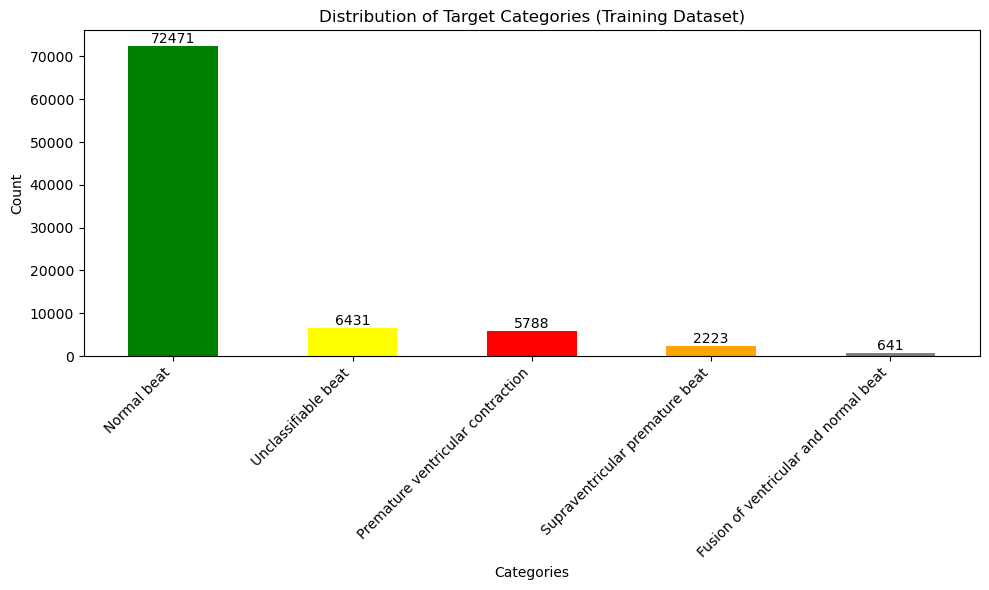

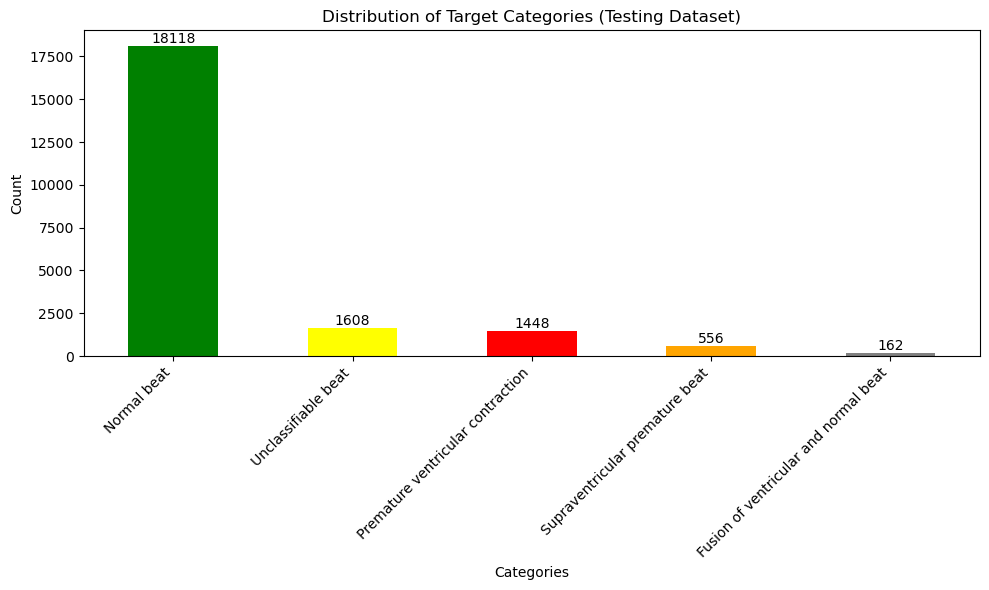

In [68]:
# train data

plt.figure(figsize=(10, 6)) # Set the figure size
bar_chart = value_counts_series_train.plot(kind='bar', color=color_mapping.values()) # Create a bar chart for the value counts of the target column in the training dataset
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Categories (Training Dataset)')
plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels

# Add labels to the bars
for container in bar_chart.containers: # Iterate over the bar containers
    plt.bar_label(container, label_type='edge') # Add labels to the bars

plt.tight_layout()
plt.show()

# test data 
plt.figure(figsize=(10, 6))
bar_chart = value_counts_series_test.plot(kind='bar', color=color_mapping.values())
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Categories (Testing Dataset)')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for container in bar_chart.containers:
    plt.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

Plot of each class once

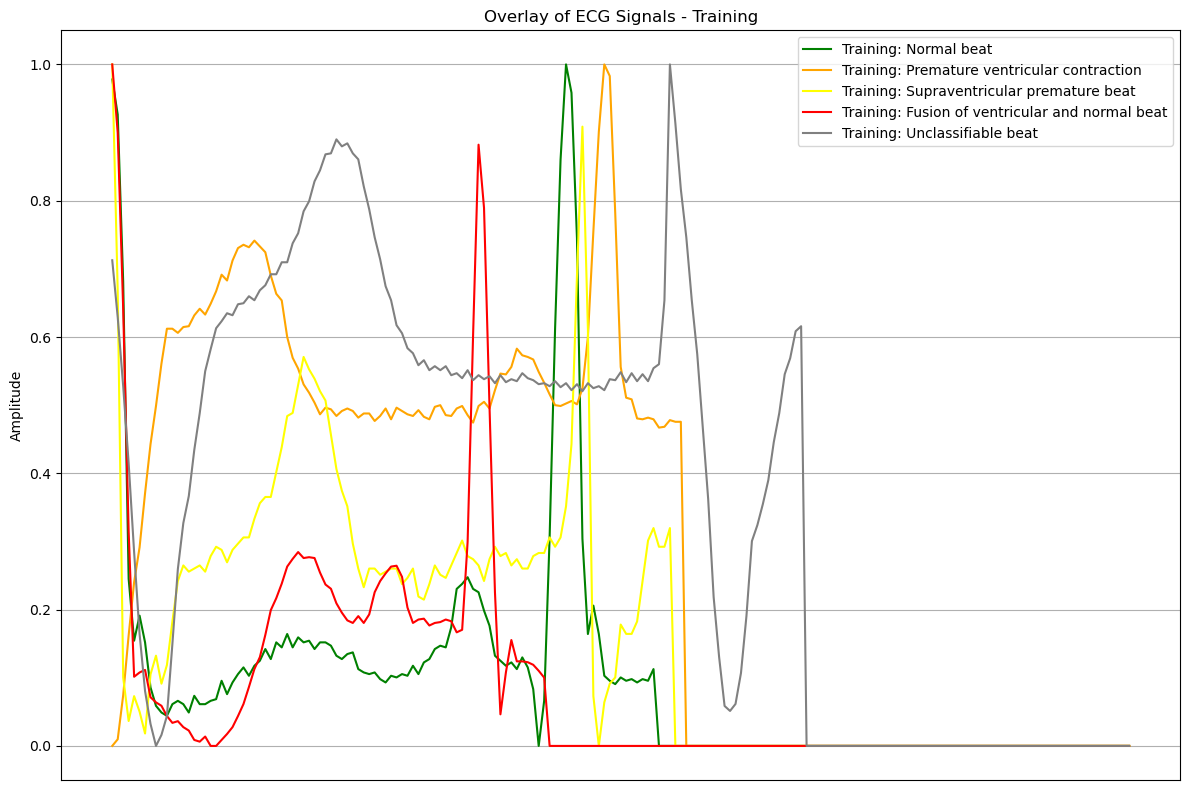

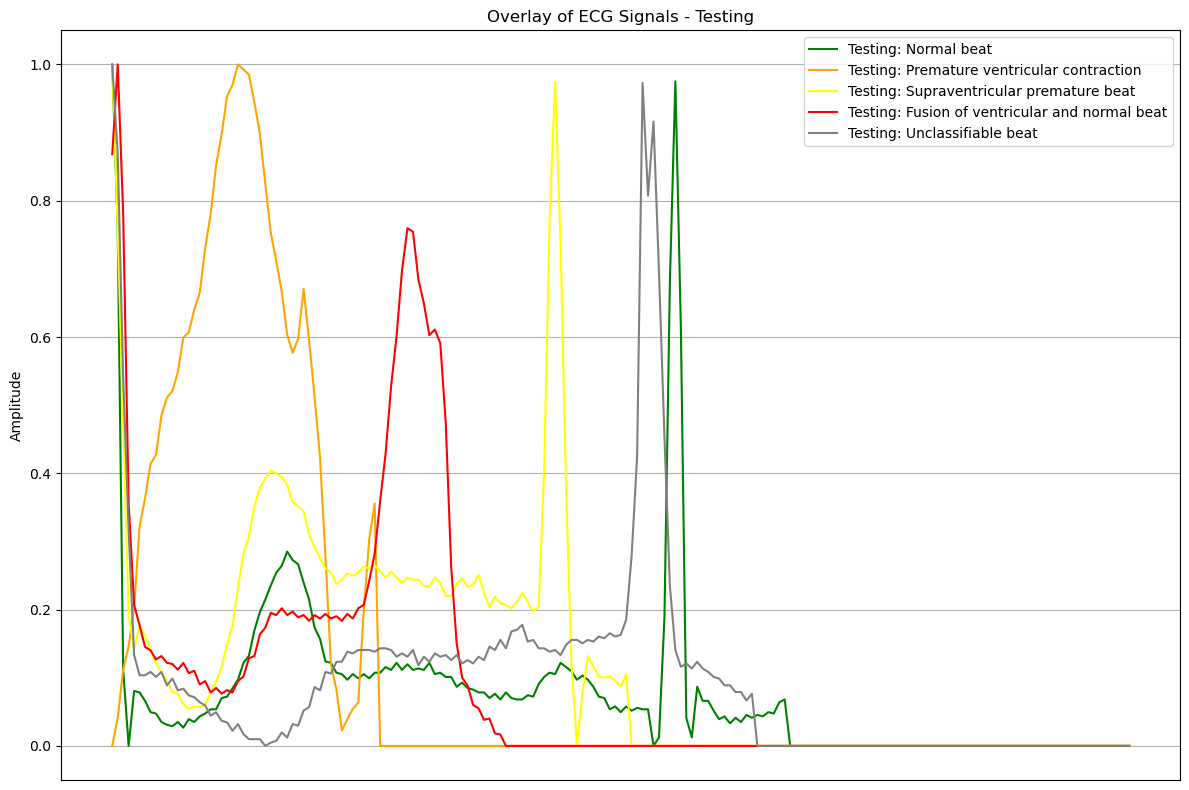

In [69]:
# Function to plot overlay of ECG signals from both datasets for a single class
def plot_overlay_ecg_signals(df, label, color, dataset_label): # Define a function to plot overlay of ECG signals for a single class from both datasets
    """
    Plot overlay of ECG signals for a single class from both datasets.

    Parameters:
    df (DataFrame): DataFrame containing ECG signals and target labels
    label (str or int): Class label to plot
    color (str): Color for the plot
    dataset_label (str): Label for the dataset (e.g., 'Training', 'Testing')
    """

    # Map the descriptive label to the corresponding class label
    if isinstance(label, str):
        class_label = [k for k, v in class_mapping.items() if v == label][0] # Get the class label for the specified class name
    else:
        class_label = label # Use the specified class label
    
    # Extract data rows for the specified class label
    class_data = df[df['target'] == class_label]

    # Check if there is any data for the specified class label
    if class_data.empty:
        print(f"No data found for class {class_mapping[class_label]}")
        return
    
    # Extract a sample data row (first row) for the specified class label
    sample_data = class_data.iloc[0]

    # Plot the sample ECG signal, excluding the 'target' column
    plt.plot(sample_data[:-1], label=f'{dataset_label}: {class_mapping[class_label]}', color=color)

    plt.title(f"Overlay of ECG Signals - {dataset_label}")
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xticks([])  # Remove x-axis ticks and labels
    plt.legend()

# List of classes to plot
classes_to_plot = ['Normal beat', 'Premature ventricular contraction', 
                   'Supraventricular premature beat', 'Fusion of ventricular and normal beat','Unclassifiable beat']

# Colors for each class
colors = ['green', 'orange', 'yellow', 'red', 'gray']

# Plotting overlay for each class in both datasets
plt.figure(figsize=(12, 8))

# Plotting for training dataset
for label, color in zip(classes_to_plot, colors):
    plot_overlay_ecg_signals(mitbih_train, label, color, 'Training')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

# Plotting for testing dataset
for label, color in zip(classes_to_plot, colors):
    plot_overlay_ecg_signals(mitbih_test, label, color, 'Testing')

plt.tight_layout()
plt.show()

Correlations between all ECG Signals by Class

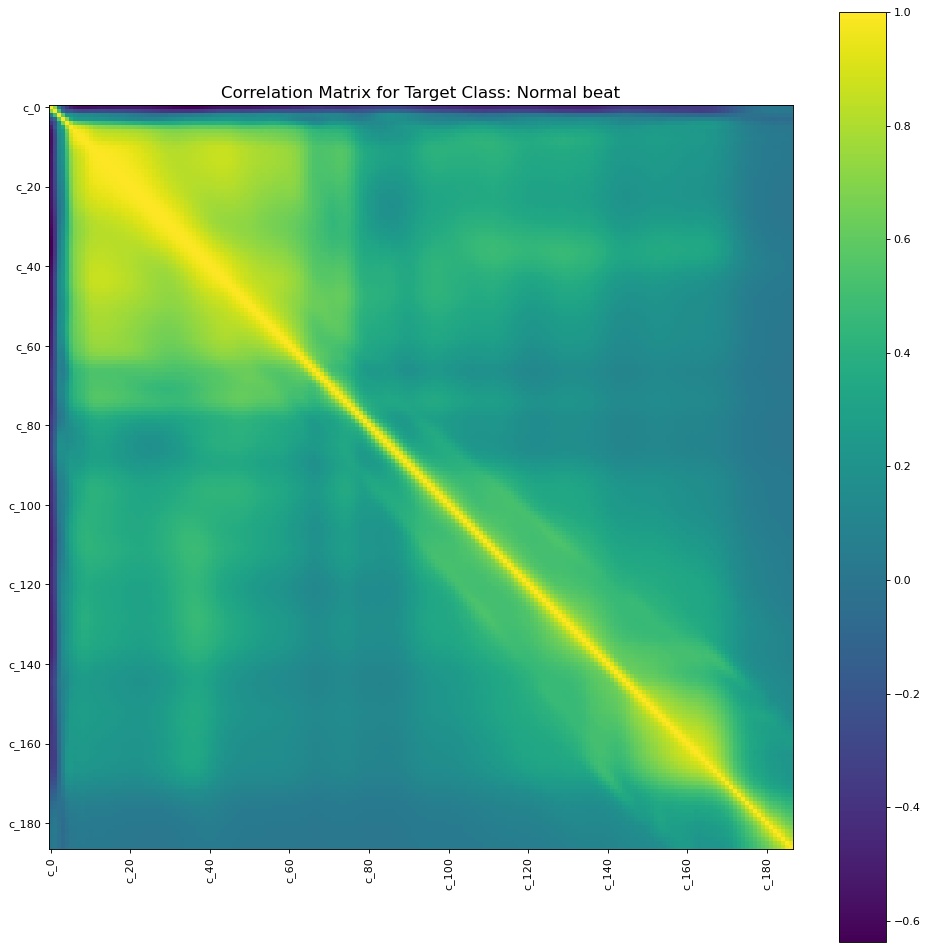

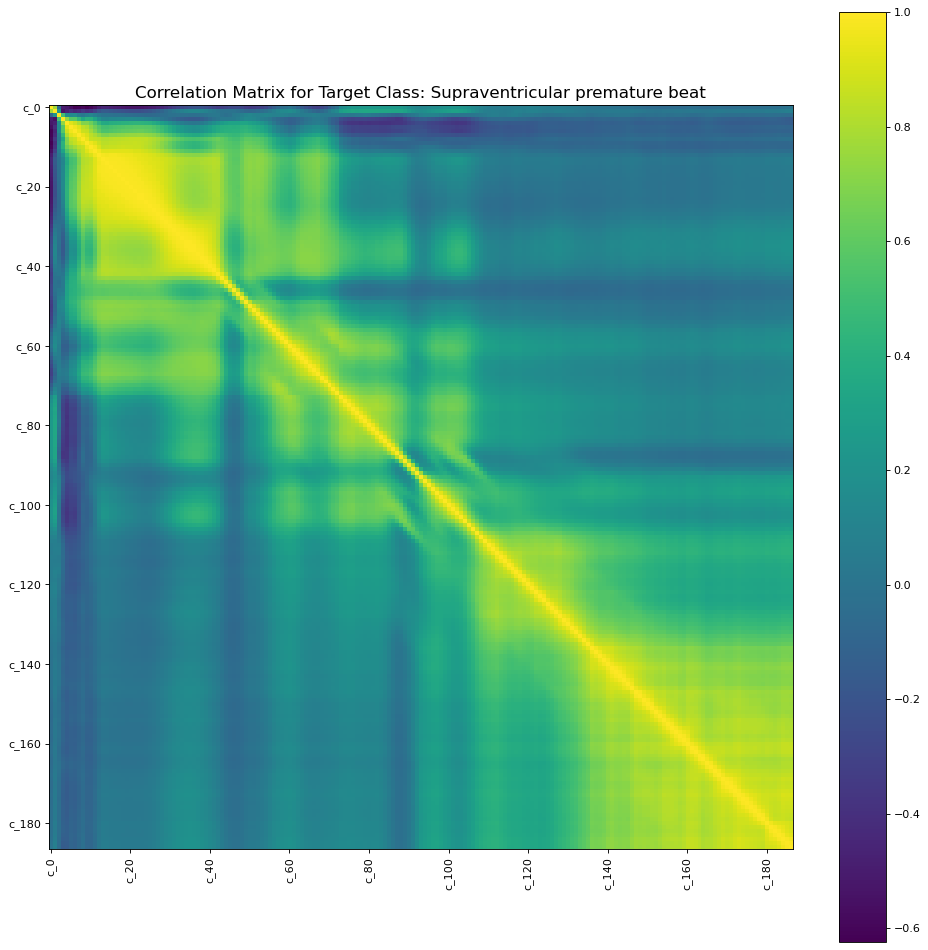

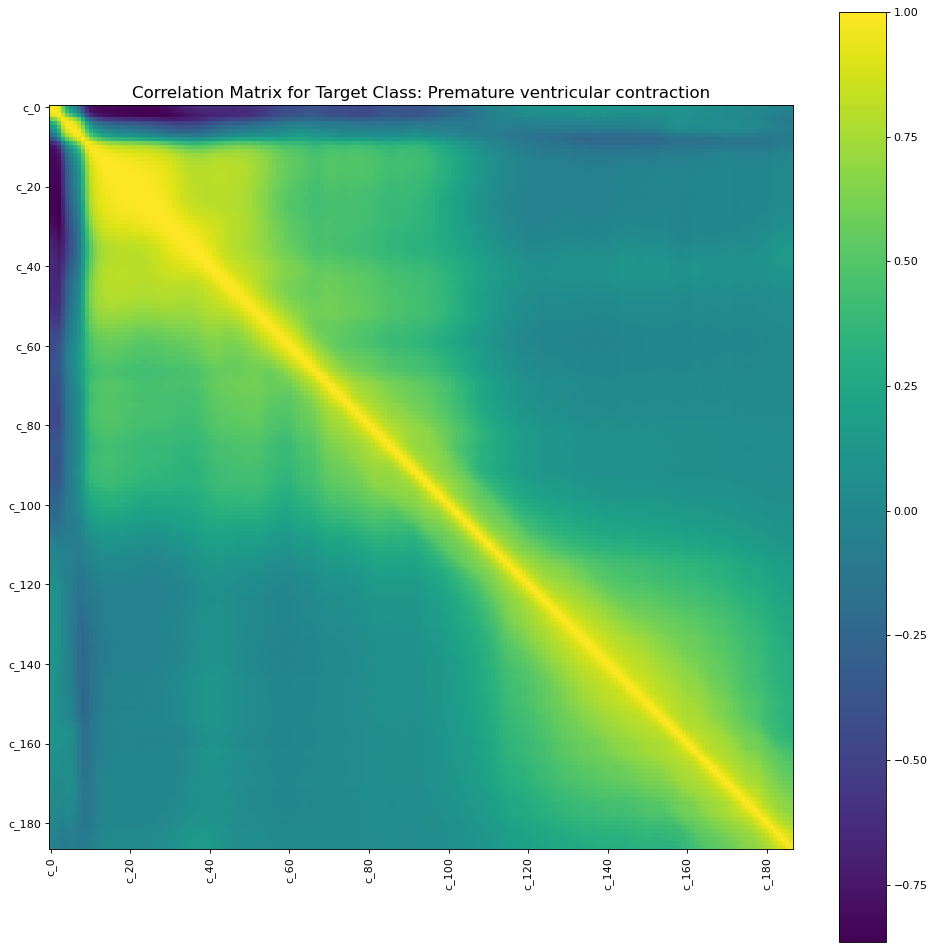

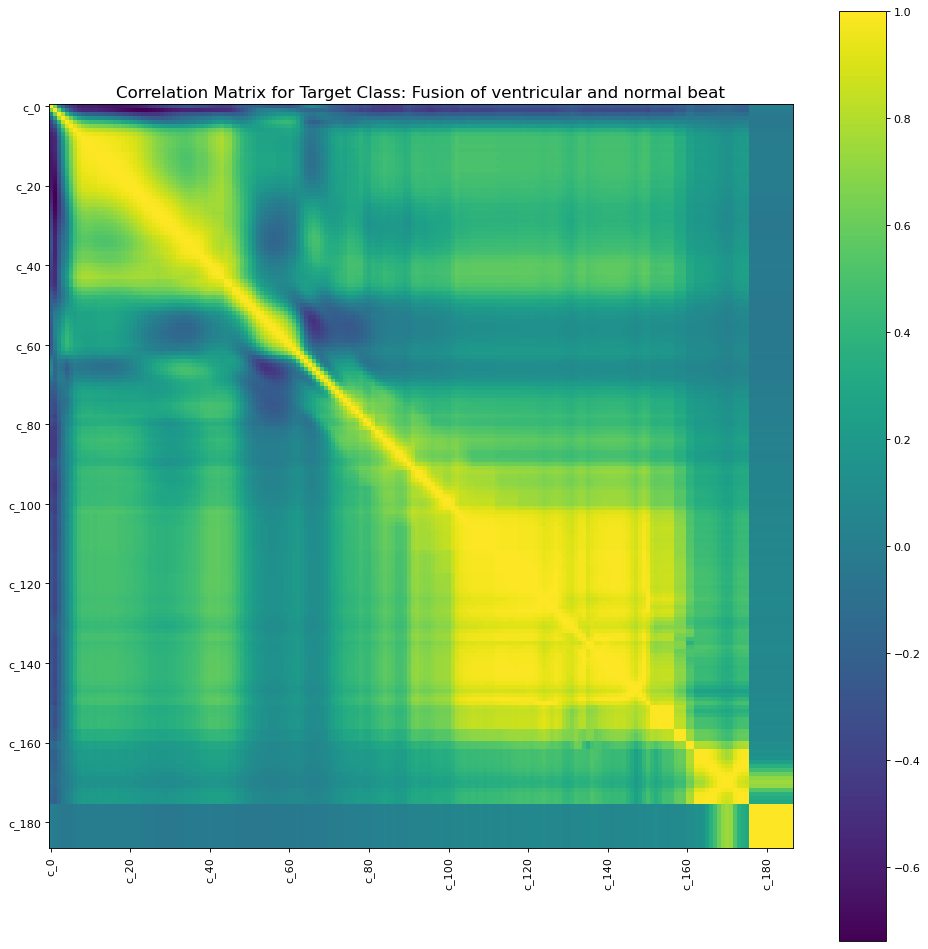

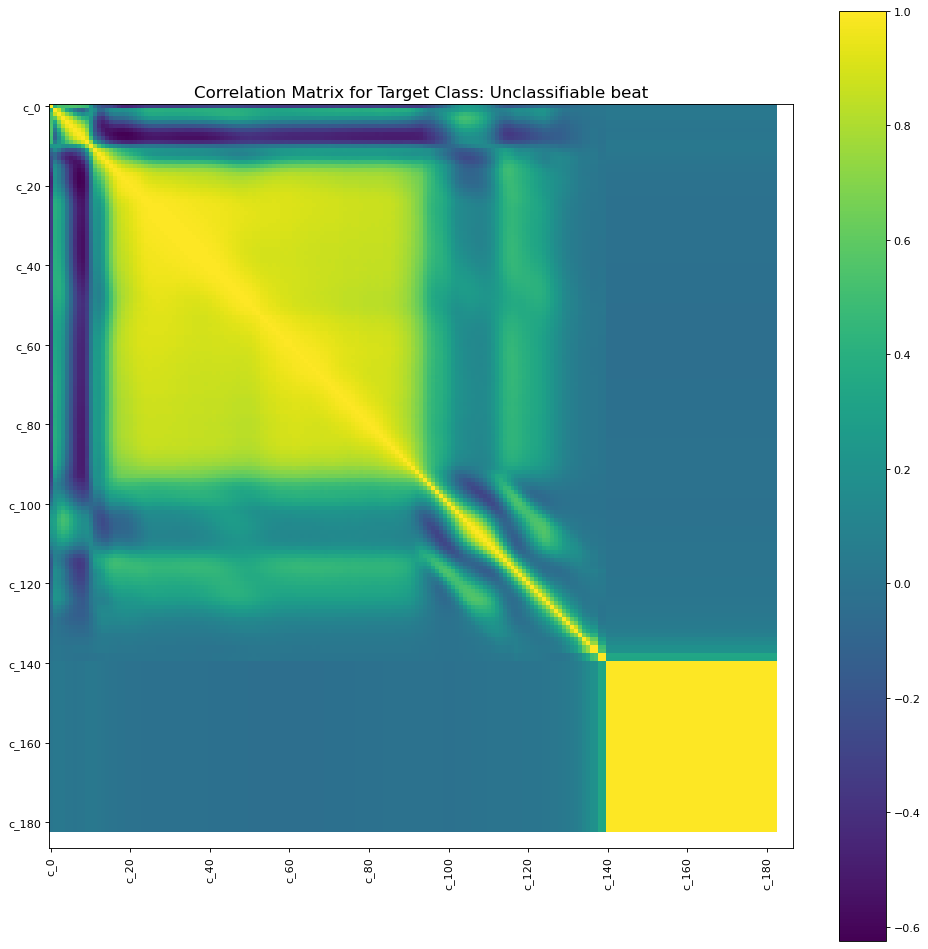

In [70]:
# Train data
def plotCorrelationMatrixByClass(mitbih_train, target, class_labels=None, class_colors=None, graphWidth=12, tick_frequency=20):
    """
    This function plots correlation matrices for each class in the target variable.
    The function takes the following arguments:
    - mitbih_train: The training dataset DataFrame
    - target: The name of the target variable column
    - class_labels: A dictionary mapping class labels to descriptive names
    - class_colors: A dictionary mapping class labels to colors
    - graphWidth: The width of the correlation matrix plot
    - tick_frequency: The frequency of x and y tick labels
    """
    # Exclude the target variable from the DataFrame
    df_without_target = mitbih_train.drop(columns=[target])
    
    # Get unique classes of the target variable
    unique_classes = mitbih_train[target].unique()
    
    # Iterate through unique classes and plot correlation matrix for each
    for cls in unique_classes:
        # Subset the data for the current class
        df_class = df_without_target[mitbih_train[target] == cls]
        
        # Calculate correlation matrix
        corr = df_class.corr()
        
        # Plotting settings with increased figure size
        plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
        corrMat = plt.matshow(corr, fignum=1)
        
        # Set x and y tick labels every tick_frequency-th label
        plt.xticks(range(0, len(corr.columns), tick_frequency), corr.columns[::tick_frequency], rotation=90)
        plt.yticks(range(0, len(corr.columns), tick_frequency), corr.columns[::tick_frequency])
        
        plt.gca().xaxis.tick_bottom()
        plt.colorbar(corrMat)
        
        # Set title using class_labels dictionary
        if cls in class_labels:
            plt.title(f'Correlation Matrix for Target Class: {class_labels[cls]}', fontsize=15)
        
        # Show plot
        plt.show()

# Define class labels and colors
plotCorrelationMatrixByClass(mitbih_train, target='target', class_labels=class_mapping, class_colors=color_mapping, graphWidth=15, tick_frequency=20)

